<a href="https://colab.research.google.com/github/flaviohahn/AM/blob/main/Pre_Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 01 Pré-processamento

Disciplina: Boas praticas em Aprendizagem de Máquina  

Professores: Aydano Machado

Alunos: Flávio Oscar Hahn e  José Adriano Pereira de Souza



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/flaviohahn/AM/main/diabetes_dataset.csv'

df = pd.read_csv(url1, error_bad_lines=False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


Verificando o numero de linhas e colunas:

In [ ]:
df.shape

(572, 9)

Verificação de instâncias com atributos nulos

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

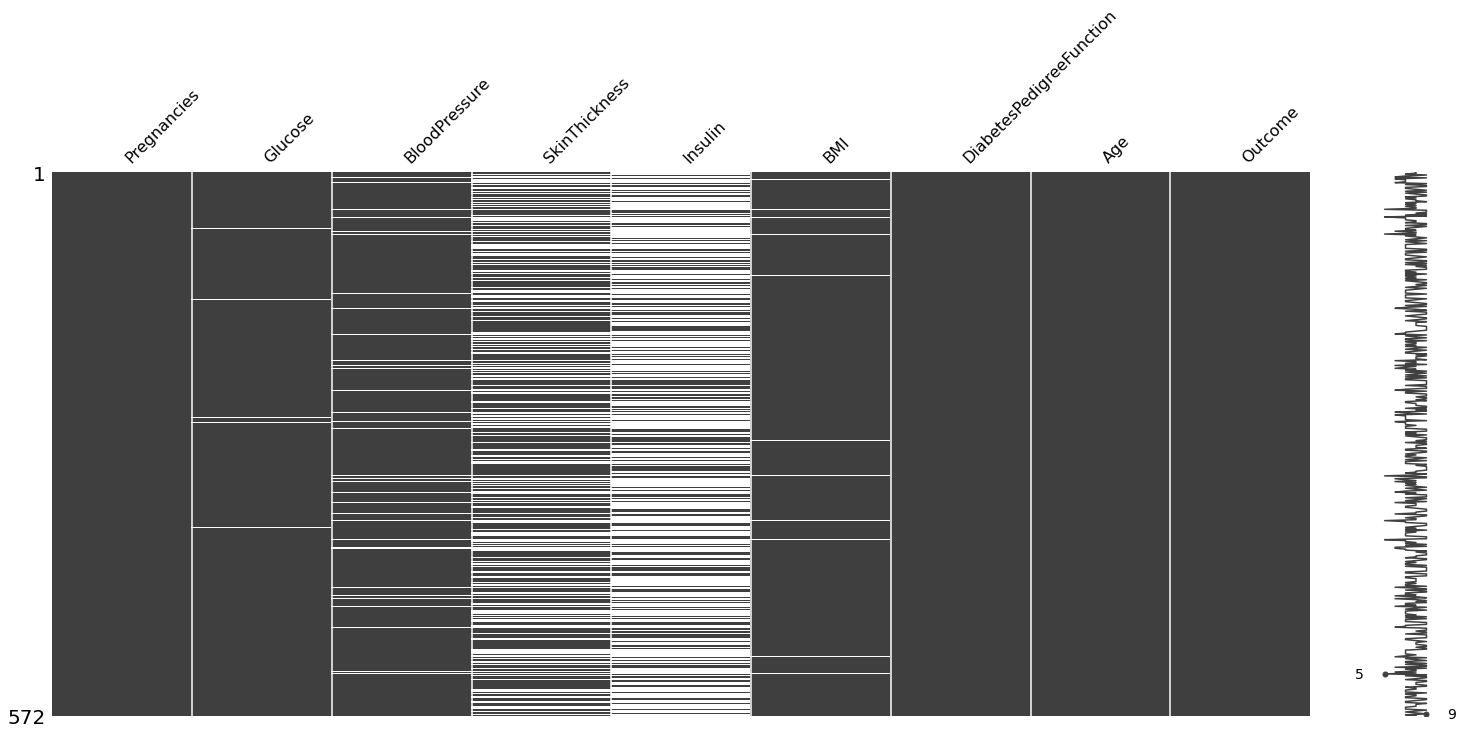

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

Percebemos que as colunas SkinThickness e Insulin possuem muitos dados faltantes, assim como Glucose,	BloodPressure e BMI os possuem, no entanto em menor número, como visto no gráfico abaixo.

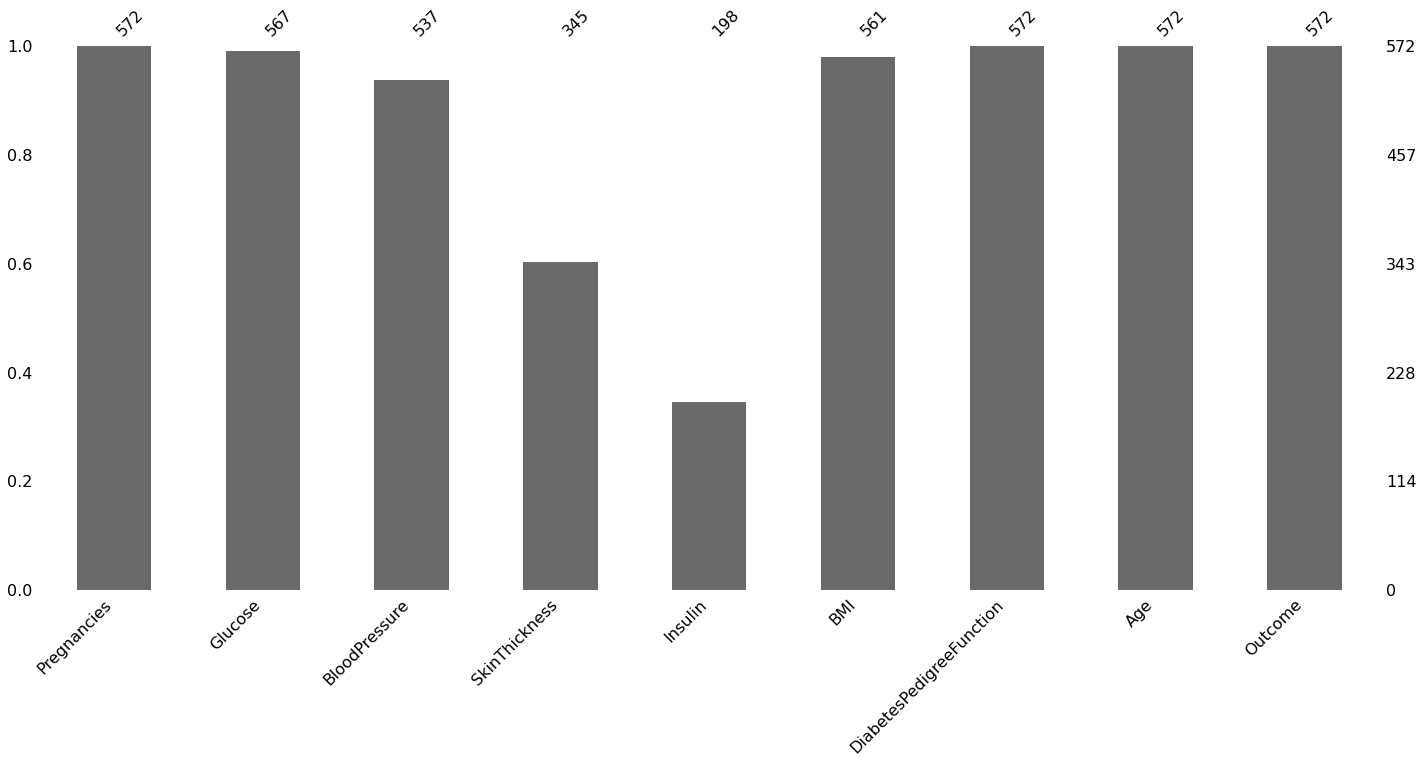

In [ ]:
msno.bar(df)
plt.show()

Como os dados de Insulin estão presentes em menos de 60% da totalidade dos dados, seguimos a recomendação de excluilos

In [ ]:
df.drop('Insulin', axis=1, inplace=True)
df.drop('SkinThickness', axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,0,137.0,40.0,43.1,2.288,33,1
4,5,116.0,74.0,25.6,0.201,30,0


Subistituindo o restante dos dados ausentes pela média
.

In [ ]:
import math
#Descobrindo valores médios:
glucoseMedia = df['Glucose'].mean()
BloodPressureMedia = df['BloodPressure'].mean()
BMIMedia = df['BMI'].mean()
#arredondando glucose média
glucoseMedia = math.floor(glucoseMedia)
BloodPressureMedia = math.floor(BloodPressureMedia)
BMIMedia = math.floor(BMIMedia)
print('Valor da glucose média: ', glucoseMedia)
print('Valor da BloodPressure média: ', BloodPressureMedia)
print('Valor da BMI média: ', BMIMedia)

Valor da glucose média:  121
Valor da BloodPressure média:  73
Valor da BMI média:  32


Aplicando a idade média nos valores nulos:

In [ ]:
df.update(df['Glucose'].fillna(glucoseMedia))
df.update(df['BloodPressure'].fillna(BloodPressureMedia))
df.update(df['BMI'].fillna(BMIMedia))

Verificando novamente os dados faltantes

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = df

# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
y_pred = neigh.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "COLOCAR_SUA_KEY_AQUI"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n"


 - Lendo o arquivo com o dataset sobre diabetes
 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset
 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor


ValueError: ignored